Invetory Demand Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sales=pd.read_csv("sales_train_evaluation.csv")
prices=pd.read_csv("sell_prices.csv")
calendar=pd.read_csv("calendar.csv")
salestrainEVALDF  = pd.read_csv("sales_train_validation.csv")

In [3]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [4]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [5]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [6]:
salestrainEVALDF.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [7]:
# Check column names in sales_df and prices_df
print("Column names in sales_df:", sales.columns)
print("Column names in prices_df:", prices.columns)
print("Columns names in calendar:", calendar.columns)
print("Columns names in salestrainEVALDF", salestrainEVALDF.columns)

Column names in sales_df: Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938',
       'd_1939', 'd_1940', 'd_1941'],
      dtype='object', length=1947)
Column names in prices_df: Index(['store_id', 'item_id', 'wm_yr_wk', 'sell_price'], dtype='object')
Columns names in calendar: Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')
Columns names in salestrainEVALDF Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1919)


In [8]:
print("sales shape: ",sales.shape)
print("prices shape: ",prices.shape)
print("calendar shape: ",calendar.shape)

sales shape:  (30490, 1947)
prices shape:  (6841121, 4)
calendar shape:  (1969, 14)


In [9]:
#Add zero sales for the remaining days 1942-1969
for d in range(1942,1970):
    col = 'd_' + str(d)
    sales[col] = 0
    sales[col] = sales[col].astype(np.int16)

In [10]:
#Downcast in order to save memory
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df  

sales = downcast(sales)
prices = downcast(prices)
calendar = downcast(calendar)

In [11]:
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()

In [12]:
df = pd.merge(df, calendar, on='d', how='left')
df = pd.merge(df, prices, on=['store_id','item_id','wm_yr_wk'], how='left')

In [13]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


In [14]:
df.isnull().sum()

id                     0
item_id                0
dept_id                0
cat_id                 0
store_id               0
state_id               0
d                      0
sold                   0
date                   0
wm_yr_wk               0
weekday                0
wday                   0
month                  0
year                   0
event_name_1    55095430
event_type_1    55095430
event_name_2    59882360
event_type_2    59882360
snap_CA                0
snap_TX                0
snap_WI                0
sell_price      12299413
dtype: int64

In [15]:
df.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sold', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price'],
      dtype='object')

In [16]:
df.describe

<bound method NDFrame.describe of                                      id        item_id    dept_id   cat_id  \
0         HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1         HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2         HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3         HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4         HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                                 ...            ...        ...      ...   
60034805    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
60034806    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
60034807    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
60034808    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
60034809    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

         store_id state_id   

In [17]:
df.info

<bound method DataFrame.info of                                      id        item_id    dept_id   cat_id  \
0         HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1         HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2         HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3         HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4         HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                                 ...            ...        ...      ...   
60034805    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
60034806    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
60034807    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
60034808    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
60034809    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

         store_id state_id     

In [18]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = calendar[['event_name_1']].dropna()
print(df['event_name_1'].unique())

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

['SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart', 'LentWeek2', ..., 'Chanukah End', 'NewYear', 'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter']
Length: 30
Categories (30, object): ['Chanukah End', 'Christmas', 'Cinco De Mayo', 'ColumbusDay', ..., 'SuperBowl', 'Thanksgiving', 'ValentinesDay', 'VeteransDay']


Amount of items sold department wise

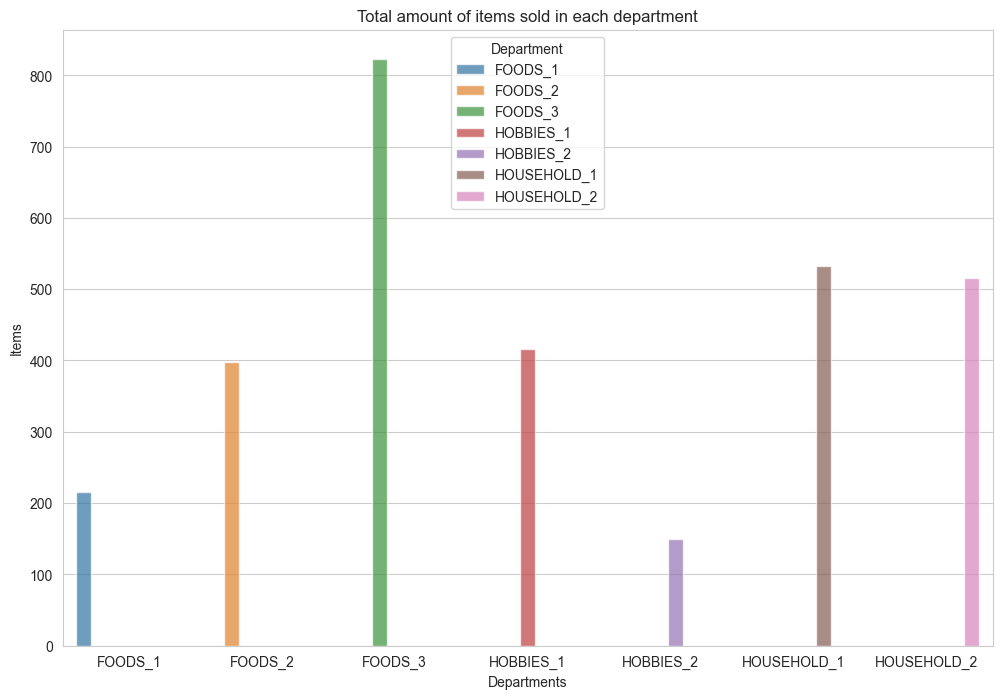

In [20]:
aux = salestrainEVALDF[['dept_id','item_id']]
aux = aux.groupby(['dept_id']).nunique().reset_index()
aux = aux.rename(columns={'item_id': 'ItemCount', 'dept_id': 'Department'})

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
itemsPlot = sns.barplot(data=aux, x='Department' , y='ItemCount', hue='Department',alpha=0.7)
itemsPlot.set_xlabel('Departments')
itemsPlot.set_ylabel('Items')
itemsPlot.set_title('Total amount of items sold in each department')
plt.ticklabel_format(style='plain', axis='y')

In [21]:
id_vars = ["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"]
trainData = pd.melt(salestrainEVALDF, id_vars=id_vars, var_name="day", value_name="unit_sales")

data = pd.merge(trainData, calendar, left_on='day', right_on='d', how='left')

In [22]:
d_ = [col for col in salestrainEVALDF.columns if "d_" in col]

total_sales = salestrainEVALDF.groupby(["cat_id", "dept_id"])[d_].sum()
total_sales = pd.DataFrame(total_sales.sum(axis=1)).reset_index().rename({0:"sales"}, axis=1)

Sales across department

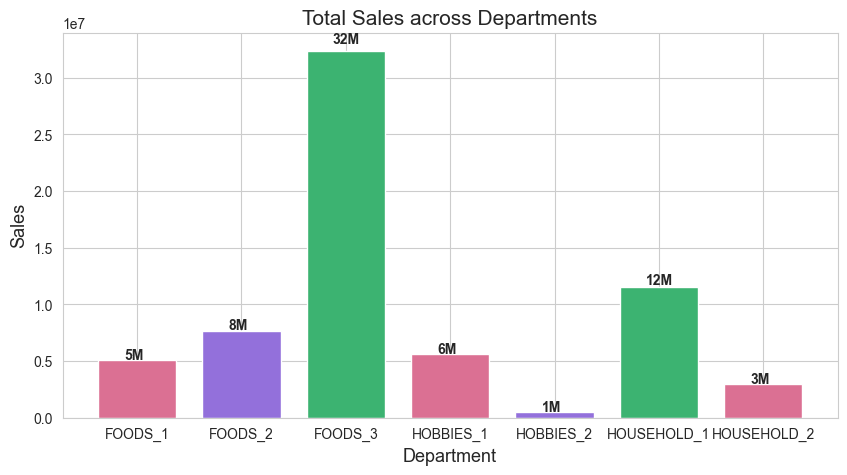

In [23]:
colors = ['palevioletred', 'mediumpurple', 'mediumseagreen']

plt.subplots(figsize=(10,5))
bar = plt.bar(total_sales["dept_id"], total_sales["sales"], width=0.75, color=colors)

sales = total_sales["sales"].tolist()

i = 0
for c in bar:
    width = c.get_width()
    height = c.get_height()
    x, y = c.get_xy()
    plt.text(x + width/3, y + height * 1.02, str(round(sales[i] / 1000000)) + "M", fontsize=10, fontweight="bold")
    i += 1

plt.title("Total Sales across Departments", fontsize=15)
plt.ylabel("Sales", fontsize=13)
plt.xlabel("Department", fontsize=13)
plt.show()

Category wise sale

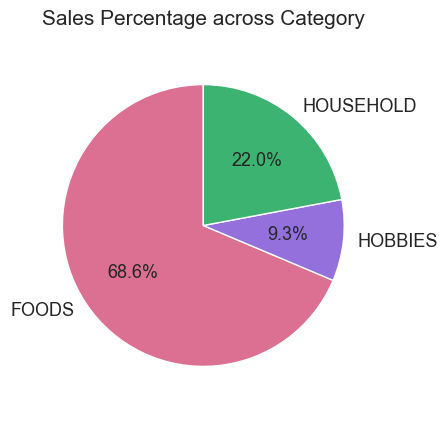

In [24]:
cat_percent = pd.DataFrame(total_sales.groupby(["cat_id"])["sales"].sum().reset_index())
colors = ['palevioletred', 'mediumpurple', 'mediumseagreen']

fig, ax = plt.subplots(figsize=(4,5))
ax.pie(cat_percent["sales"], labels=cat_percent["cat_id"], autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 13})
ax.axis('equal')
plt.title("Sales Percentage across Category", fontsize=15)
plt.show()

State wise sale

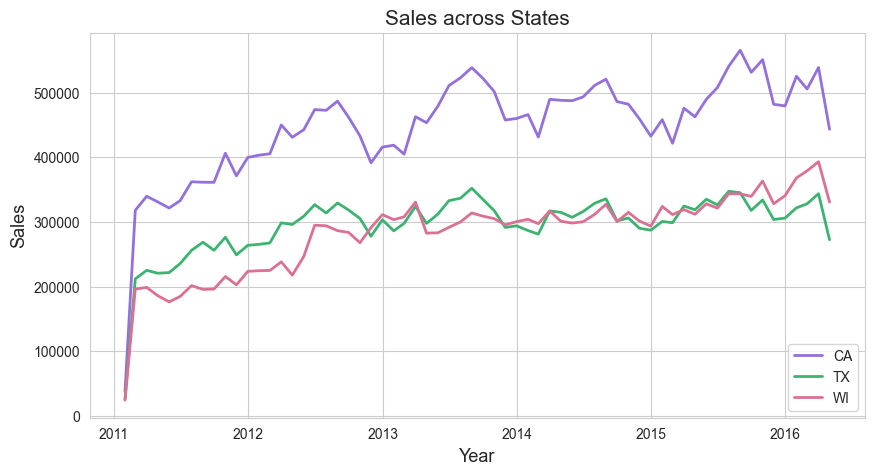

In [25]:
state_sales = salestrainEVALDF.groupby("state_id")[d_].sum().T\
                        .merge(calendar.set_index("d"), how="left", left_index=True,
                         right_index=True, validate="1:1").loc[:, ["CA","WI","TX","date"]]
state_sales["date"] = pd.to_datetime(state_sales["date"])
state_sales = state_sales.set_index("date").resample("1m").sum()

plt.subplots(figsize=(10, 5))
plt.plot(state_sales["CA"], label="CA", color='mediumpurple', linewidth=2)
plt.plot(state_sales["TX"], label="TX", color='mediumseagreen', linewidth=2)
plt.plot(state_sales["WI"], label="WI", color='palevioletred', linewidth=2)
plt.legend(loc="lower right", prop={'size': 10})
plt.title("Sales across States", fontsize=15)
plt.ylabel("Sales", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.show()

Store wise sales

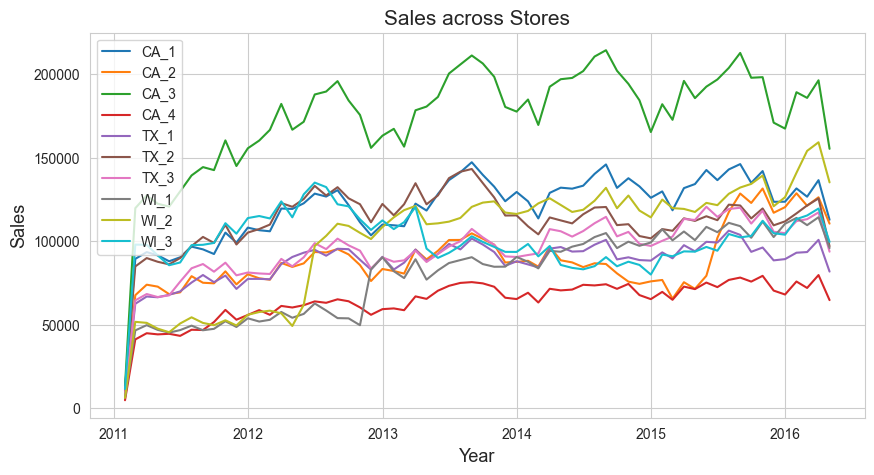

In [26]:
store_sales = salestrainEVALDF.groupby("store_id")[d_].sum().T\
                    .merge(calendar.set_index("d"), how="left", left_index=True,
                    right_index=True, validate="1:1").loc[:, "CA_1":"date"]
store_sales["date"] = pd.to_datetime(store_sales["date"])
store_sales = store_sales.set_index("date").resample("1m").sum()

plt.subplots(figsize=(10, 5))

store = list(store_sales.columns.values)

for i in range(10):
    plt.plot(store_sales[store[i]], label=store[i], linewidth=1.5)

plt.legend(loc="upper left")
plt.title("Sales across Stores", fontsize=15)
plt.ylabel("Sales", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.show()

Hypothesis 1 : Sales of 'Food' during event days are higher than sales during non-event days

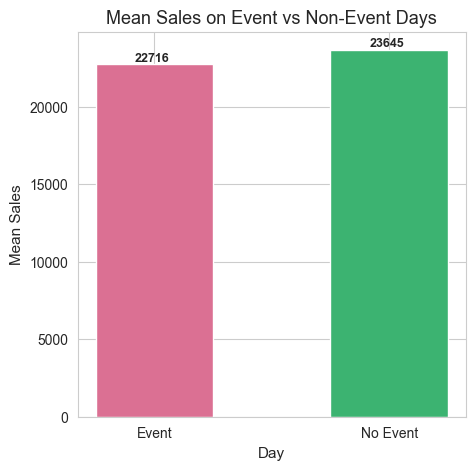

In [27]:
event = salestrainEVALDF.groupby("cat_id")[d_].sum().T\
                    .merge(calendar[["date","d","event_type_1"]].set_index("d"), how="left", left_index=True,
                    right_index=True, validate="1:1")
                             
event = event.drop(columns=['HOBBIES', 'HOUSEHOLD'])

event["event_type_1"] = event.event_type_1.map({'Sporting':"Event", 'Cultural':"Event", 'National':"Event", 'Religious':"Event"})
event.event_type_1.fillna("No Event", inplace=True)

event_ = event.melt(id_vars=["date","event_type_1"], var_name='category',value_name="sales")
event_ = event_.groupby(["category","event_type_1"])["sales"].mean().reset_index()

plt.subplots(figsize=(5,5))
bar = plt.bar(event_["event_type_1"], event_["sales"], width=0.5, color=['palevioletred', 'mediumseagreen'])

sales = event_["sales"].tolist()

i = 0
for c in bar:
    width = c.get_width()
    height = c.get_height()
    x, y = c.get_xy()
    plt.text(x + width/3, y + height * 1.01, round(sales[i]), fontsize=9, fontweight="bold")
    i += 1

plt.title("Mean Sales on Event vs Non-Event Days", fontsize=13)
plt.ylabel("Mean Sales", fontsize=11)
plt.xlabel("Day", fontsize=11)
plt.show()


Total sales on Monday to Thursday are lower than Friday to Sunday.

In [28]:
stv = pd.DataFrame(salestrainEVALDF[d_].T.sum(axis=1)).rename({0:"sales"}, axis=1)\
                    .merge(calendar.set_index("d"), how="left", left_index=True,
                    right_index=True, validate="1:1")

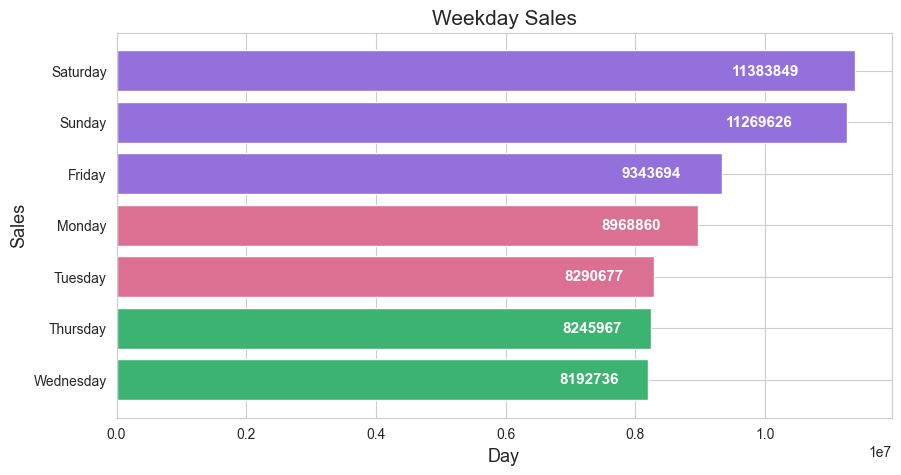

In [29]:
weekday = stv.groupby(["weekday"])["sales"].sum()
weekday = pd.DataFrame(weekday).reset_index().sort_values(by=['sales'])
colors = ['mediumseagreen', 'mediumseagreen', 'palevioletred', 'palevioletred', 'mediumpurple', 'mediumpurple', 'mediumpurple']

plt.subplots(figsize=(10,5))
bar = plt.barh(weekday["weekday"], weekday["sales"], color=colors)

sales = weekday["sales"].tolist()

i = 0
for c in bar:
    width = c.get_width()
    height = c.get_height()
    x, y = c.get_xy()
    plt.text(x + width / 1.2, y + height * 0.4, sales[i], fontsize=11, color="white", fontweight="bold")
    i += 1

plt.title("Weekday Sales", fontsize=15)
plt.ylabel("Sales", fontsize=13)
plt.xlabel("Day", fontsize=13)
plt.show()